In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from google.colab import files
uploaded = files.upload()

Saving startup_funding.csv to startup_funding.csv


In [3]:
df = pd.read_csv("startup_funding.csv")
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


Bangalore


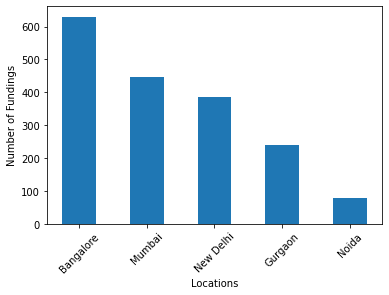

In [4]:
df = pd.read_csv("startup_funding.csv")
df["CityLocation"].fillna("", inplace = True) # neglecting all none values from cityLocation
df["CityLocation"].replace("Delhi", "New Delhi", inplace = True) # replacing Delhi as New Delhi
df["CityLocation"].replace("bangalore", "Bangalore", inplace = True) # replaceing bangalore as Bangalore
df["CityLocation"].replace("SFO / Bangalore", "Bangalore", inplace = True) # Replacing "SFO / Bangalore" as "Bangalore"
df["CityLocation"].replace("Seattle / Bangalore", "Bangalore", inplace = True) # Replacing "Seattle / Bangalore" as "Bangalore"
x = df["CityLocation"] # selecting CityLocation column 
D = {}
for i in x :
    if i == "Bangalore" :  # funding in "Bangalore"
        D["Bangalore"] = D.get(i,0) + 1
    elif  i == "Mumbai" : # funding in "Mumbai"
        D["Mumbai"] = D.get(i,0) + 1 
    elif  i == "Gurgaon" : # funding in "Gurgaon"
        D["Gurgaon"] = D.get(i,0) + 1 
    elif  i == "Noida" : # funding in "Noida"
        D["Noida"] = D.get(i,0) + 1 
    elif  i == "New Delhi" : # funding in "New Delhi"
        D["New Delhi"] = D.get(i,0) + 1 

City = sorted(D, key = D.get, reverse = True) # sorting the dictionary D in descending order
fundings = []  

for i in City: 
    fundings.append(D[i])
    
print(City[0]) # printing the city name having highest funding

plt.bar(City,fundings, width = 0.5) # bar plot between city and funding
plt.xlabel("Locations") 
plt.ylabel("Number of Fundings")
plt.xticks(rotation = 45)
plt.show()

In [5]:
df = pd.read_csv("startup_funding.csv")
df.dropna(subset = ["InvestorsName"],inplace = True) # drop null values in "InvestorsName"
df["InvestorsName"] = df["InvestorsName"].str.replace(",\xa0 ",",") 
df["InvestorsName"] = df["InvestorsName"].str.replace(", ",",")

Dict = {}
x = df["InvestorsName"] # selecting the column "InvestorsName"
for i in x.values : 
    if "," in i :
        string = i.strip().split(',') # spliting multiple investors in string
        for j in string :
            Dict[j] = Dict.get(j,0) + 1
    else :
        Dict[i] = Dict.get(i, 0) + 1
D = sorted(Dict, key = Dict.get, reverse = True)[0:5] # selecting top 5 investors from the dictionary Dict
for i in D :
    print(i, Dict[i])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


In [6]:
df = pd.read_csv("startup_funding.csv")
# removing null values in the dataset 
df.dropna(subset = ["InvestorsName"],inplace = True) 
df.dropna(subset = ["StartupName"],inplace = True) 

df["InvestorsName"] = df["InvestorsName"].str.replace(",\xa0 ",",")
df["InvestorsName"] = df["InvestorsName"].str.replace(", ",",")

# correcting all names of top startups for getting proper count
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

# counting the top investor using Dictionary
Dict = {}
for i in df.index:
    e = df["InvestorsName"][i].strip() 
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in Dict:
                Dict[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                Dict[j.strip()] = s # using set to not repeat same Startup in the dataset
                Dict[j.strip()].add(df["StartupName"][i].strip())
    else:
        a = e.strip()
        if a in Dict: 
            Dict[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            Dict[a] = s
            Dict[a].add(df["StartupName"][i].strip())

D = {}
for i in Dict:
    if i == "": # neglecting the null values in the Dictionary in Dict
        continue
    D[i] = len(Dict[i]) # add count of number of investor in the Dict
D1 = sorted(D, key=D.get , reverse=True)[0:5] # sort and select top 5 startups 
for x in D1 :
    print(x) 

Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


In [7]:
df = pd.read_csv("startup_funding.csv")
# Drop all null values from column Investor
df.dropna(subset = ["InvestorsName"],inplace = True) 
df["InvestorsName"].replace("Undisclosed Investors","",inplace = True) 
df["InvestorsName"].replace("Undisclosed investors","",inplace = True)
df = df[(df["InvestmentType"] == "Seed Funding") | (df["InvestmentType"] == "Crowd Funding")]  # focussing on "Seed Funding" or "Crowd Funding"

d = {} 
# making a dictionary of investor name with its count
for i in df["InvestorsName"].values : 
    if "," in i :  
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
        
del d[""] # deleting null elements in the dictionary

d1 = sorted(d, key=d.get , reverse=True)[0:5] 
for i in d1:
    print(i, d[i])

Indian Angel Network 33
Rajan Anandan 25
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


In [8]:
df = pd.read_csv("startup_funding.csv")
df.dropna(subset = ["InvestorsName"],inplace = True) 
df["InvestorsName"].replace("Undisclosed Investors","",inplace = True)
df["InvestorsName"].replace("Undisclosed investors","",inplace = True)
df = df[(df["InvestmentType"] == "Private Equity")] # focus on private funding as now startup is grown at some stage
df = df[df["InvestmentType"] != ""] # neglecting None values
d = {}
for i in df["InvestorsName"].values:  
    if "," in i:  
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
        
d1 = sorted(d, key=d.get , reverse=True)[0:5]  
for i in d1:
    print(i, d[i])

Sequoia Capital 59
Accel Partners 47
Kalaari Capital 38
SAIF Partners 35
Blume Ventures 28
